# **Experiment-3 Notebook (K-Nearest Neighbour)**

# **Machine Learning Algorithms & Appliations (36106)**


## Context

Experiment 3: Train a K-Nearest Neighbour model using the selected features, analyze the results, and make recommendations for further experiments.

### 0. Import Packages

In [1]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 23.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.1.1 which is incompatible.


In [2]:
#Importing necessary datasets required for running this experiment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 1.   Load Dataset

In [4]:
from google.colab import files

# Defining list of files we need to run this experiment
file_names = ["repurchase_dataset.csv"]

# Loop through the list and upload each file
for file_name in file_names:
    uploaded = files.upload()

Saving repurchase_dataset.csv to repurchase_dataset.csv


In [5]:
df = pd.read_csv("repurchase_dataset.csv")

### 2. Explore Dataset

In [6]:
# Printing the first few rows of the dataset
df.head(5)

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [7]:
# Printing the last few rows of the dataset
df.tail(5)

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
131332,154134,1,NaN,NaN,model_3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
131333,154135,1,NaN,NaN,model_3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
131334,154137,1,NaN,NaN,model_5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
131335,154138,1,NaN,NaN,model_5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10
131336,154139,1,NaN,NaN,model_1,LCV,6,1,7,1,10,10,5,3,4,9,10


In [8]:
# Describing the shape of the dataset
df.shape

(131337, 17)

In [9]:
# Get a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

### 3. Explore Target variable

In the context of predicting whether an existing customer is more likely to re-buy a new car, the target variable would typically be whether the customer has purchased more than one vehicle. Therefore, the target variable in this case would be the "re-purchase likelihood" of the customer, represented as a binary outcome: 1 if the customer has purchased more than one vehicle, and 0 if they have only purchased one.

In [10]:
target = df['Target']
target

0         0
1         0
2         0
3         0
4         0
         ..
131332    1
131333    1
131334    1
131335    1
131336    1
Name: Target, Length: 131337, dtype: int64

In [11]:
# Checking for any Missing Values in Target Variable
missing_values = target.isnull().sum()
print("Number of missing values in salary:", missing_values)

Number of missing values in salary: 0


In [12]:
# Displaying the descriptive statstics of target variable
summary_stats = target.describe()
summary_stats = summary_stats.astype(int)
print(summary_stats)

count    131337
mean          0
std           0
min           0
25%           0
50%           0
75%           0
max           1
Name: Target, dtype: int64


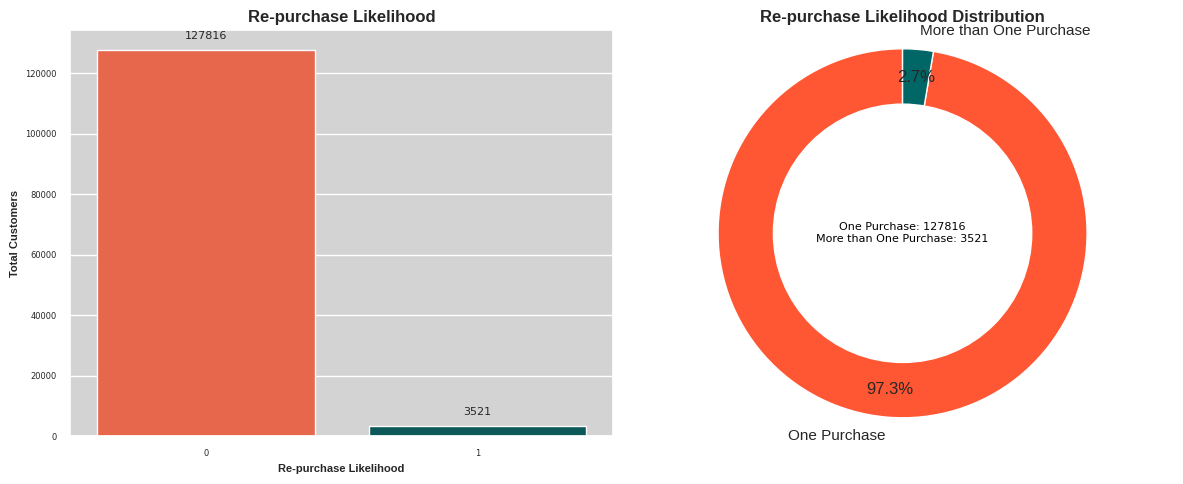

In [13]:
# Define custom colors
palette_features = ['#FF5733', '#006666']

# Set background color of all plots
sns.set(rc={'axes.facecolor': 'lightgray'})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot countplot on the first subplot
sns.countplot(data=df, x='Target', palette=palette_features, hue='Target', ax=axes[0], legend=False)
axes[0].set_title('Re-purchase Likelihood', fontsize=12, fontweight='bold', fontname='Liberation Sans', ha='center')
axes[0].set_xlabel('Re-purchase Likelihood', fontsize=8, fontweight='bold', fontname='Liberation Sans')
axes[0].set_ylabel('Total Customers', fontsize=8, fontweight='bold', fontname='Liberation Sans')
axes[0].tick_params(axis='both', labelsize=6)

# Add labels to the bars
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points',
                     fontsize=8)  # Adjust label font size

# Plot pie chart on the second subplot
target_counts = df['Target'].value_counts()
target_distribution = df['Target'].value_counts(normalize=True) * 100

axes[1].pie(target_distribution, labels=target_distribution.index.map({0: 'One Purchase', 1: 'More than One Purchase'}),
            autopct='%1.1f%%', colors=palette_features, pctdistance=0.85, startangle=90,
            textprops={'fontname': 'Liberation Sans'})  # Set fontname for labels in pie chart

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
total_counts = f"One Purchase: {target_counts[0]}\nMore than One Purchase: {target_counts[1]}"
axes[1].text(x=0, y=0, s=total_counts, horizontalalignment='center', verticalalignment='center', fontsize=8, color='black')  # Adjust text font size
axes[1].axis('equal')
axes[1].set_title('Re-purchase Likelihood Distribution', fontsize=12, fontweight='bold', fontname='Liberation Sans', ha='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### 4. Explore Variables of Interest

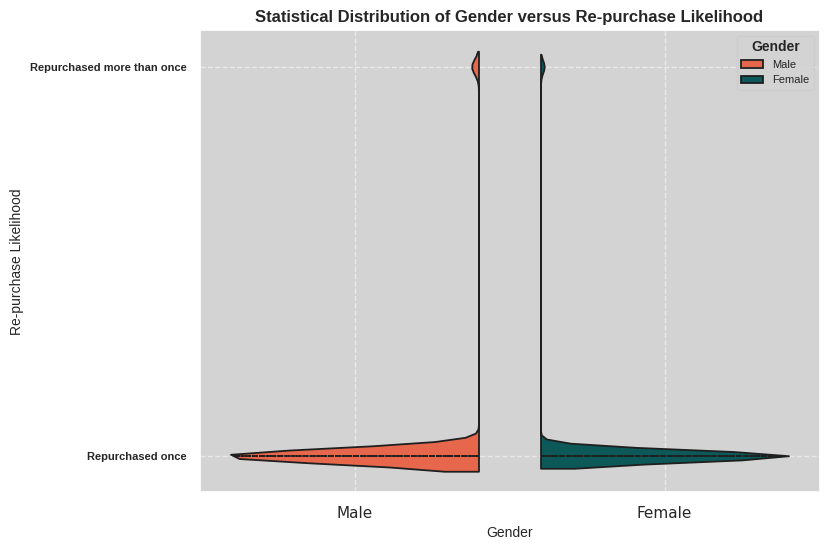

In [14]:
# Exploring relationship betweenTarget Variable & Gender (Violin Plot)

# Set custom color palette
colors = ['#FF5733', '#006666']

plt.figure(figsize=(8, 6))

# Create violin plot
sns.violinplot(x='gender', y='Target', data=df, hue='gender', palette=colors, split=True, inner="quart", linewidth=1.3)

# Add title and labels with reduced font sizes
plt.title('Statistical Distribution of Gender versus Re-purchase Likelihood', fontsize=12, fontweight='bold', fontname='Liberation Sans', ha='center')
plt.xlabel('Gender', fontsize=10, fontname='Liberation Sans', ha='center')
plt.ylabel('Re-purchase Likelihood', fontsize=10, fontname='Liberation Sans')

# Customize y-axis tick labels for better readability
plt.yticks([0, 1], ['Repurchased once', 'Repurchased more than once'], fontsize=8, fontweight='bold', fontname='Liberation Sans')

# Add legend with custom font
legend = plt.legend(title="Gender", loc="best", prop={'family': 'Liberation Sans', 'size': 8})
plt.setp(legend.get_title(), fontsize='10', fontweight='bold', fontname='Liberation Sans')

# Add gridlines for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [15]:
# Map the age bands to the desired labels
age_band_labels = {
    '1. <25': '>25',
    '2. 25 to 34': '25-34',
    '3. 35 to 44': '35-44',
    '4. 45 to 54': '45-54',
    '5. 55 to 64': '55-64',
    '6. 65 to 74': '65-74',
    '7. 75+': '<75'
}

# Replace the age_band values with the new labels
df['age_band'] = df['age_band'].map(age_band_labels)

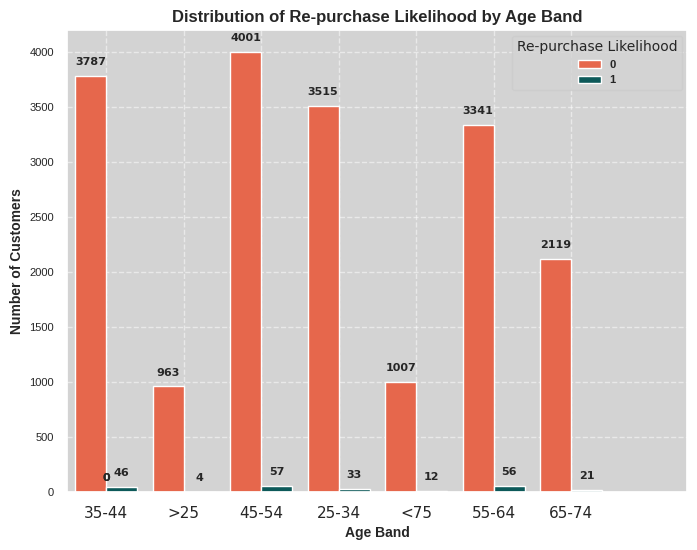

In [16]:
#Exploring Relationship between Age groups of Customers with respcect to Repurchase Status
colors = ['#FF5733', '#006666']

# Create a figure and axis objects
plt.figure(figsize=(8, 6))

# Create the stacked bar plot
ax = sns.countplot(data=df, x='age_band', hue='Target', palette=colors)

# Add title and labels with specified font
plt.title('Distribution of Re-purchase Likelihood by Age Band', fontsize=12, fontweight='bold', fontname='Liberation Sans', ha='center')
plt.xlabel('Age Band', fontsize=10, fontname='Liberation Sans', ha='center', fontweight='bold')
plt.ylabel('Number of Customers', fontsize=10, fontname='Liberation Sans', fontweight='bold')

# Customize y-axis tick labels for better readability
plt.yticks(fontsize=8, fontname='Liberation Sans')

# Customize legend font
plt.legend(title="Re-purchase Likelihood", loc="upper right", fontsize=8, title_fontsize='10', prop={'family': 'Liberation Sans', 'size': 8, 'weight': 'bold'})

# Add data labels and markers
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 10),
                 textcoords = 'offset points',
                 fontsize=8, fontweight='bold')

# Set x-axis limits to ignore the extra 0
plt.xlim(-0.5, len(df['age_band'].unique()) - 0.5)

# Add gridlines for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

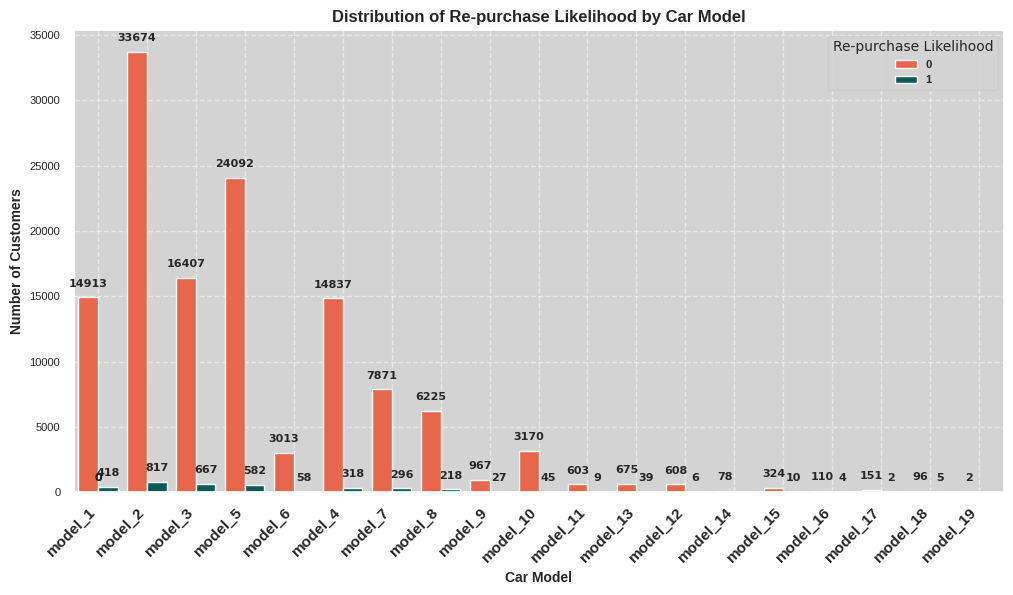

In [17]:
# Exploring Relationship between Model of the Vehicle with respcect to Repurchase Status

colors = ['#FF5733', '#006666']

# Create a figure and axis objects
plt.figure(figsize=(12, 6))

# Create the countplot for car_model
ax = sns.countplot(data=df, x='car_model', hue='Target', palette=colors)

# Rotate x-axis labels for better readability and set font
plt.xticks(rotation=45, ha='right', fontname='Liberation Sans', fontweight='bold')

# Add title and labels with specified font
plt.title('Distribution of Re-purchase Likelihood by Car Model', fontsize=12, fontweight='bold', fontname='Liberation Sans', ha='center')
plt.xlabel('Car Model', fontsize=10, fontname='Liberation Sans', ha='center', fontweight='bold')
plt.ylabel('Number of Customers', fontsize=10, fontname='Liberation Sans', fontweight='bold')

# Customize y-axis tick labels for better readability
plt.yticks(fontsize=8, fontname='Liberation Sans')

# Customize legend font
plt.legend(title="Re-purchase Likelihood", loc="upper right", fontsize=8, title_fontsize='10', prop={'family': 'Liberation Sans', 'size': 8, 'weight': 'bold'})

# Add data labels and markers
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 10),
                 textcoords = 'offset points',
                 fontsize=8, fontweight='bold')

# Add gridlines for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

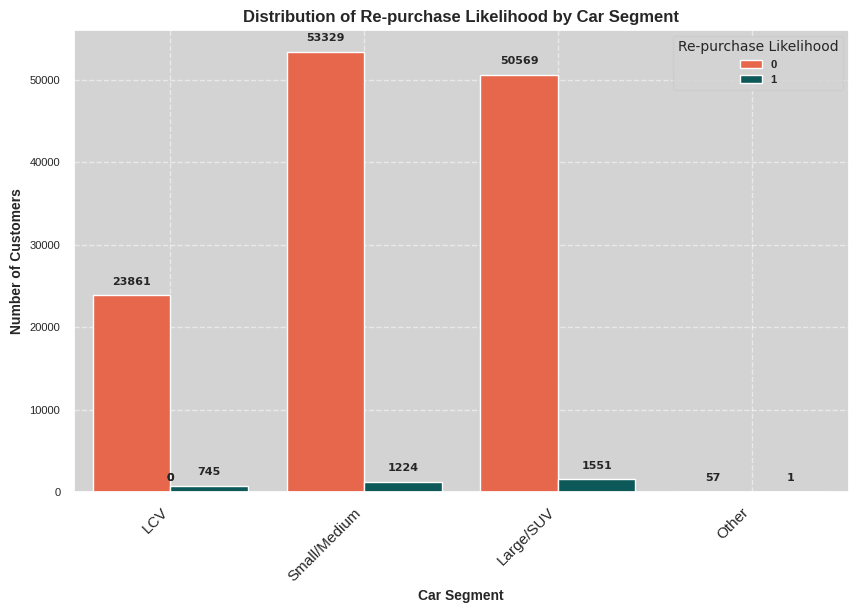

In [18]:
#Exploring Relationship between Segment of Vehicle with respcect to Repurchase Status

colors = ['#FF5733', '#006666']

# Create a figure and axis objects
plt.figure(figsize=(10, 6))

# Create the countplot for car_segment
ax = sns.countplot(data=df, x='car_segment', hue='Target', palette=colors)

# Rotate x-axis labels for better readability and set font
plt.xticks(rotation=45, ha='right', fontname='Liberation Sans')

# Add title and labels with specified font
plt.title('Distribution of Re-purchase Likelihood by Car Segment', fontsize=12, fontweight='bold', fontname='Liberation Sans', ha='center')
plt.xlabel('Car Segment', fontsize=10, fontname='Liberation Sans', ha='center', fontweight='bold')
plt.ylabel('Number of Customers', fontsize=10, fontname='Liberation Sans', fontweight='bold')

# Customize y-axis tick labels for better readability
plt.yticks(fontsize=8, fontname='Liberation Sans')

# Customize legend font
plt.legend(title="Re-purchase Likelihood", loc="upper right", fontsize=8, title_fontsize='10', prop={'family': 'Liberation Sans', 'size': 8, 'weight': 'bold'})

# Add data labels and markers
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 10),
                 textcoords = 'offset points',
                 fontsize=8, fontweight='bold')

# Add gridlines for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

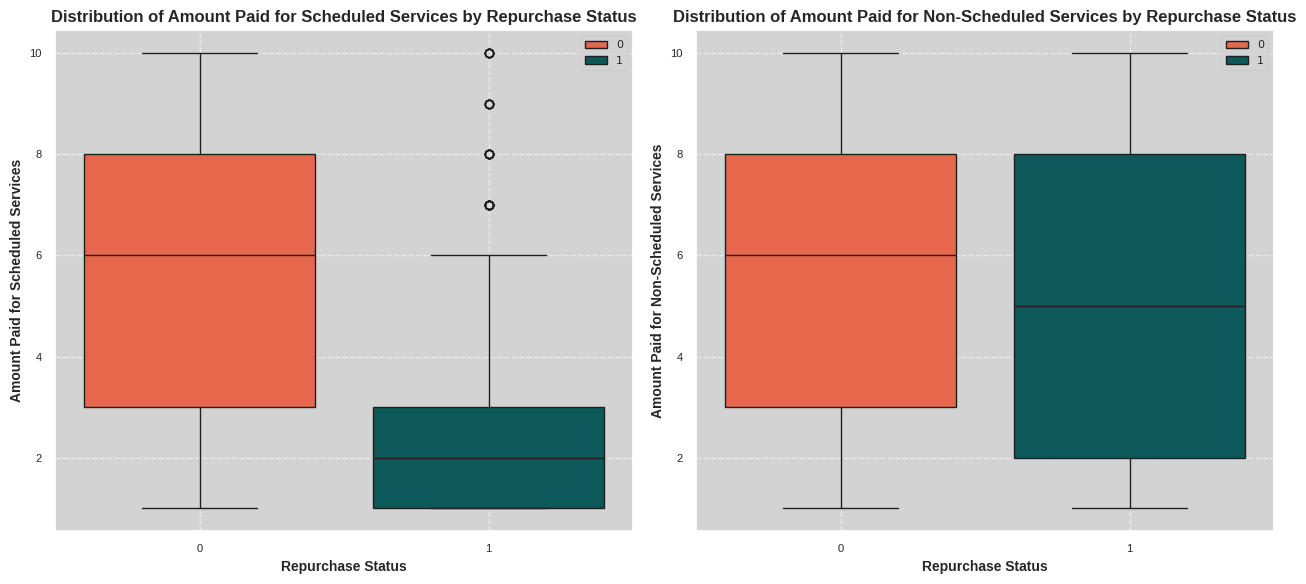

In [19]:
#Exploring Relationship between Total Amount paid for Number of Scheduled & Non Scheduled Services with respcect to Repurchase Status

# Set custom color palette
colors = ['#FF5733', '#006666']

# Create a figure and axis objects
plt.figure(figsize=(13, 6))

# Create box plot for sched_serv_paid
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Target', y='sched_serv_paid', hue='Target', palette=colors, dodge=False)
plt.title('Distribution of Amount Paid for Scheduled Services by Repurchase Status', fontsize=12, fontweight='bold', fontname='Liberation Sans', ha='center')
plt.xlabel('Repurchase Status', fontsize=10, fontname='Liberation Sans', ha='center', fontweight='bold')
plt.ylabel('Amount Paid for Scheduled Services', fontsize=10, fontname='Liberation Sans', fontweight='bold')
plt.xticks(fontsize=8, fontname='Liberation Sans')
plt.yticks(fontsize=8, fontname='Liberation Sans')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title=None, loc='best', fontsize=8)

# Create box plot for non_sched_serv_paid
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Target', y='non_sched_serv_paid', hue='Target', palette=colors, dodge=False)
plt.title('Distribution of Amount Paid for Non-Scheduled Services by Repurchase Status', fontsize=12, fontweight='bold', fontname='Liberation Sans', ha='center')
plt.xlabel('Repurchase Status', fontsize=10, fontname='Liberation Sans', ha='center', fontweight='bold')
plt.ylabel('Amount Paid for Non-Scheduled Services', fontsize=10, fontname='Liberation Sans', fontweight='bold')
plt.xticks(fontsize=8, fontname='Liberation Sans')
plt.yticks(fontsize=8, fontname='Liberation Sans')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title=None, loc='best', fontsize=8)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

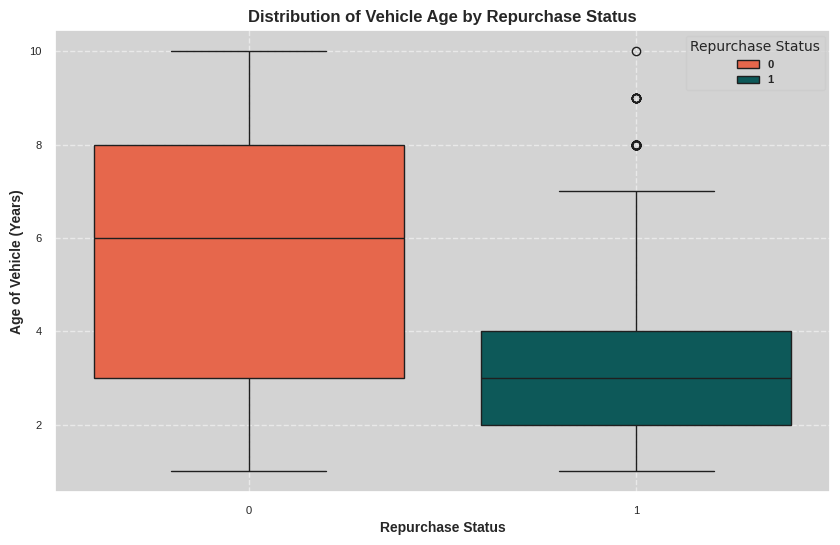

In [20]:
#Exploring Relationship between Age of Vehicle with respcect to Repurchase Status

colors = ['#FF5733', '#006666']

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Target', y='age_of_vehicle_years', hue='Target', palette=colors, dodge=False)

# Add title with specified font
plt.title('Distribution of Vehicle Age by Repurchase Status', fontsize=12, fontweight='bold', fontname='Liberation Sans', ha='center')

# Update x-axis label with specified font
plt.xlabel('Repurchase Status', fontsize=10, fontname='Liberation Sans', ha='center', fontweight='bold')

# Update y-axis label with specified font
plt.ylabel('Age of Vehicle (Years)', fontsize=10, fontname='Liberation Sans', fontweight='bold')

# Customize tick labels
plt.xticks(fontsize=8, fontname='Liberation Sans')
plt.yticks(fontsize=8, fontname='Liberation Sans')

# Customize legend font and title
plt.legend(title="Repurchase Status", loc="best", fontsize=8, title_fontsize='10', prop={'family': 'Liberation Sans', 'size': 8, 'weight': 'bold'})

# Add gridlines for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

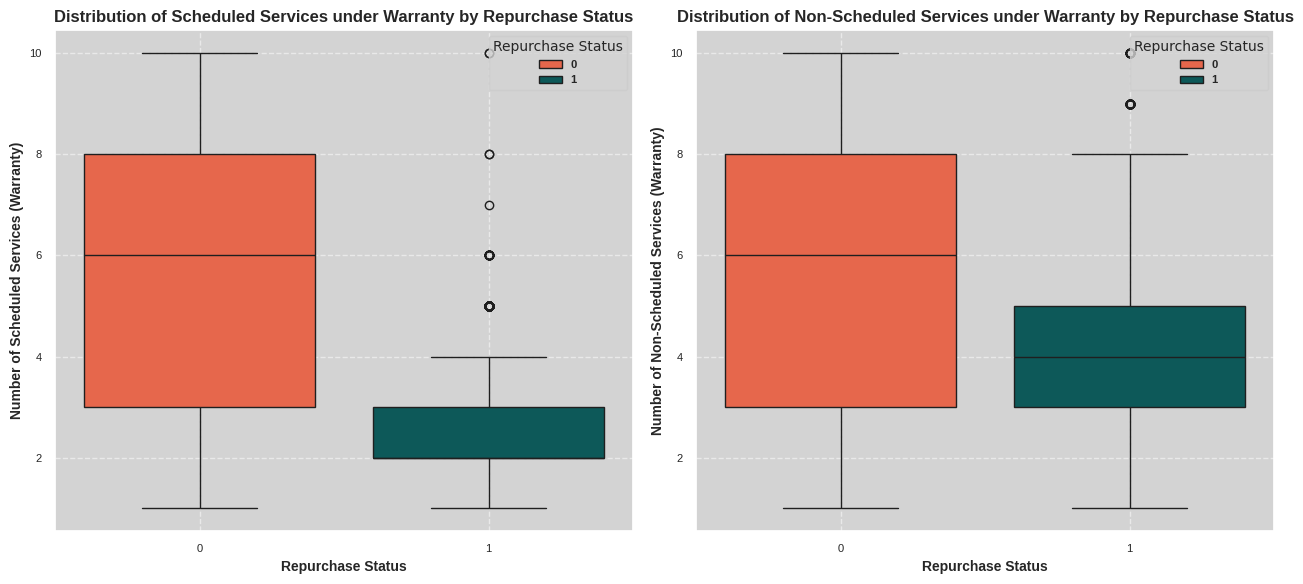

In [21]:
#Exploring Relationship between Total Number of Scheduled & Non Scheduled Services with respcect to Repurchase Status

colors = ['#FF5733', '#006666']

# Create a figure and axis objects
plt.figure(figsize=(13, 6))

# Create box plots for sched_serv_warr
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Target', y='sched_serv_warr', hue='Target', palette=colors, dodge=False)
plt.title('Distribution of Scheduled Services under Warranty by Repurchase Status', fontsize=12, fontweight='bold', fontname='Liberation Sans', ha='center')
plt.xlabel('Repurchase Status', fontsize=10, fontname='Liberation Sans', ha='center', fontweight='bold')
plt.ylabel('Number of Scheduled Services (Warranty)', fontsize=10, fontname='Liberation Sans', fontweight='bold')
plt.xticks(fontsize=8, fontname='Liberation Sans')
plt.yticks(fontsize=8, fontname='Liberation Sans')
plt.legend(title="Repurchase Status", loc="best", fontsize=8, title_fontsize='10', prop={'family': 'Liberation Sans', 'size': 8, 'weight': 'bold'})
plt.grid(True, linestyle='--', alpha=0.5)

# Create box plots for non_sched_serv_warr
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Target', y='non_sched_serv_warr', hue='Target', palette=colors, dodge=False)
plt.title('Distribution of Non-Scheduled Services under Warranty by Repurchase Status', fontsize=12, fontweight='bold', fontname='Liberation Sans', ha='center')
plt.xlabel('Repurchase Status', fontsize=10, fontname='Liberation Sans', ha='center', fontweight='bold')
plt.ylabel('Number of Non-Scheduled Services (Warranty)', fontsize=10, fontname='Liberation Sans', fontweight='bold')
plt.xticks(fontsize=8, fontname='Liberation Sans')
plt.yticks(fontsize=8, fontname='Liberation Sans')
plt.legend(title="Repurchase Status", loc="best", fontsize=8, title_fontsize='10', prop={'family': 'Liberation Sans', 'size': 8, 'weight': 'bold'})
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### 5. Prepare Data

In [22]:
df_cleaned = df.copy()

Missing Values:
age_band    112375
gender       69308
dtype: int64


<Figure size 800x400 with 0 Axes>

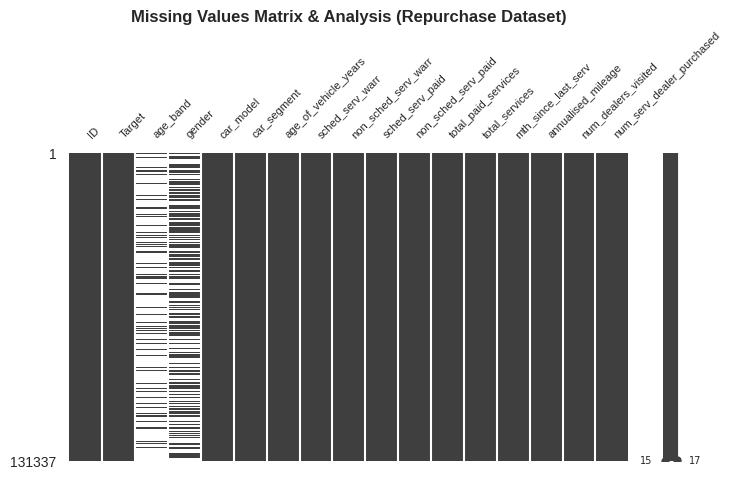

In [23]:
import missingno as msno

def check_missing_values(df):
    # Check for missing values
    missing_values = df.isnull().sum()

    # Filter out columns with missing values
    missing_values = missing_values[missing_values > 0]

    if missing_values.empty:
        print("No missing values found!")
    else:
        print("Missing Values:")
        print(missing_values)

        # Visualize missing values using missingno
        plt.figure(figsize=(8, 4))  # Adjust the plot size
        msno.matrix(df, figsize=(8, 4), fontsize=8)  # Set the font size
        plt.title('Missing Values Matrix & Analysis (Repurchase Dataset)', fontsize=12, fontname='Liberation Sans', fontweight='bold')
        plt.xticks(fontname='Liberation Sans')  # Set x-axis font to Liberation Sans
        plt.yticks(fontname='Liberation Sans')  # Set y-axis font to Liberation Sans
        plt.show()

# Call the function with your DataFrame
check_missing_values(df_cleaned)

In [24]:
# Impute missing values in 'age_band' and 'gender' columns with mode
df_cleaned['age_band'].fillna(df_cleaned['age_band'].mode()[0], inplace=True)
df_cleaned['gender'].fillna(df_cleaned['gender'].mode()[0], inplace=True)

In [25]:
df_cleaned.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,35-44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,45-54,Male,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,45-54,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,45-54,Male,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,45-54,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [26]:
def get_column_lists(df_cleaned):
    # List of categorical columns for one-hot encoding
    categorical_columns = [col for col in df_cleaned.columns if df_cleaned.dtypes[col] == 'object']

    # List of numerical columns to standardized data
    numerical_columns = [col for col in df_cleaned.columns if df_cleaned.dtypes[col] != 'object']

    return numerical_columns, categorical_columns

# Call the function with your DataFrame
numerical_cols, categorical_cols = get_column_lists(df_cleaned)

print('Numerical Features are:', numerical_cols)
print('Categorical Features are:', categorical_cols)

Numerical Features are: ['ID', 'Target', 'age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services', 'total_services', 'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited', 'num_serv_dealer_purchased']
Categorical Features are: ['age_band', 'gender', 'car_model', 'car_segment']


In [27]:
# Removing duplicate rows from the dataset

def drop_duplicates(df):
    # Check for duplicate rows
    duplicate_rows = df[df.duplicated()]

    if duplicate_rows.empty:
        print("No duplicate rows found!")
    else:
        print("Duplicate Rows:")
        print(duplicate_rows)

        # Drop duplicate rows
        df.drop_duplicates(inplace=True)
        print("Duplicate rows have been dropped.")

# Call the function with your DataFrame
drop_duplicates(df_cleaned)

No duplicate rows found!


In [28]:
# Removing irrelevant columns from the dataset

def drop_columns(df_cleaned, columns_to_drop):
    df_cleaned.drop(columns_to_drop, axis=1, inplace=True)
    return df_cleaned

columns_to_drop = ['ID']

df_cleaned = drop_columns(df_cleaned, columns_to_drop)

In [29]:
df_cleaned.head()

,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,0,35-44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,0,45-54,Male,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,0,45-54,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,0,45-54,Male,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,0,45-54,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [30]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop through each categorical column
for col in df_cleaned.select_dtypes(include=['object']).columns:
    # Check if the column has missing values
    if df_cleaned[col].isnull().any():
        # If yes, fill missing values with a placeholder
        df_cleaned[col].fillna('missing', inplace=True)

    # Encode the column
    df_cleaned[col + '_encoded'] = label_encoder.fit_transform(df_cleaned[col])

# Check the new columns
df_cleaned.head()

,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,age_band_encoded,gender_encoded,car_model_encoded,car_segment_encoded
0,0,35-44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4,1,1,0,0
1,0,45-54,Male,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10,2,1,11,3
2,0,45-54,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10,2,1,12,1
3,0,45-54,Male,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7,2,1,12,1
4,0,45-54,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9,2,0,11,3


In [31]:
# Select only the numerical columns
numerical_df = df_cleaned.select_dtypes(include='number')

# Display the numerical columns
print("Numerical Columns:")
print(numerical_df.columns)

Numerical Columns:
Index(['Target', 'age_of_vehicle_years', 'sched_serv_warr',
       'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid',
       'total_paid_services', 'total_services', 'mth_since_last_serv',
       'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'age_band_encoded', 'gender_encoded',
       'car_model_encoded', 'car_segment_encoded'],
      dtype='object')


In [32]:
df = numerical_df

In [33]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Target'])  # Features
y = df['Target']  # Target variable

### 6. Split Dataset

In [34]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Perform train-validation-test split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Perform oversampling using SMOTE on the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### 7. Baseline Model

In [35]:
# Calculate the mode of the target variable after resampling
y_central = y.mode()
y_central

0    0
Name: Target, dtype: int64

In [36]:
y_base = np.full(y_train.shape, y_central)
y1_base = np.full(y_val.shape, y_central)
y2_base = np.full(y_test.shape, y_central)

In [37]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy_train = accuracy_score(y_train, y_base)
accuracy_val = accuracy_score(y_val, y1_base)
accuracy_test = accuracy_score(y_test, y2_base)

# Display the accuracy score
print("Accuracy for Training Set:", accuracy_train)
print("Accuracy for Validation Set:", accuracy_val)
print("Accuracy for Test Set:", accuracy_test)

Accuracy for Training Set: 0.9731856194718341
Accuracy for Validation Set: 0.9731993299832495
Accuracy for Test Set: 0.9731993299832495


In [38]:
train_perf = accuracy_train
valid_perf = accuracy_val
test_perf = accuracy_test

### 8. Train Machine Learning Model

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create KNN model
knn_model = KNeighborsClassifier()

In [40]:
# Fit the model on training data
knn_model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [41]:
# Predict on validation set
y_val_pred = knn_model.predict(X_val)

# Calculate evaluation metrics for validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_roc_auc = roc_auc_score(y_val, y_val_pred)

print("Validation Set Metrics:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)
print("ROC AUC score:", val_roc_auc)

Validation Set Metrics:
Accuracy: 0.9797852900867976
Precision: 0.584390243902439
Recall: 0.8508522727272727
F1-score: 0.6928860613071139
ROC AUC score: 0.9170941069472696


In [42]:
# Predict on test set
y_test_pred = knn_model.predict(X_test)

# Calculate evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)
print("ROC AUC score:", test_roc_auc)


Test Set Metrics:
Accuracy: 0.9780721790772042
Precision: 0.5606060606060606
Recall: 0.8409090909090909
F1-score: 0.6727272727272727
ROC AUC score: 0.9113792833672351


In [43]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

# Create KNN model
knn_model = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform grid search to find the best parameters
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_knn_model = grid_search.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [44]:
# Evaluate the best model on the validation set & test set after Hypermeter Tuning

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate the best model on the validation set
val_accuracy = best_knn_model.score(X_val, y_val)
print("Validation Set Accuracy:", val_accuracy)

# Make predictions on the validation set
y_val_pred = best_knn_model.predict(X_val)

# Calculate precision, recall, F1-score, and ROC AUC score for validation set
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_roc_auc = roc_auc_score(y_val, best_knn_model.predict_proba(X_val)[:, 1])

print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1-score:", val_f1)
print("Validation ROC AUC score:", val_roc_auc)

# Evaluate the best model on the test set
test_accuracy = best_knn_model.score(X_test, y_test)
print("\nTest Set Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = best_knn_model.predict(X_test)

# Calculate precision, recall, F1-score, and ROC AUC score for test set
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, best_knn_model.predict_proba(X_test)[:, 1])

print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-score:", test_f1)
print("Test ROC AUC score:", test_roc_auc)

Validation Set Accuracy: 0.9814984010963911
Validation Precision: 0.6219239373601789
Validation Recall: 0.7897727272727273
Validation F1-score: 0.6958698372966208
Validation ROC AUC score: 0.9201354377071451

Test Set Accuracy: 0.9799375666209837
Test Precision: 0.5973597359735974
Test Recall: 0.7713068181818182
Test F1-score: 0.6732796032238066
Test ROC AUC score: 0.9186912570589323


### 9. Assess Model Performance

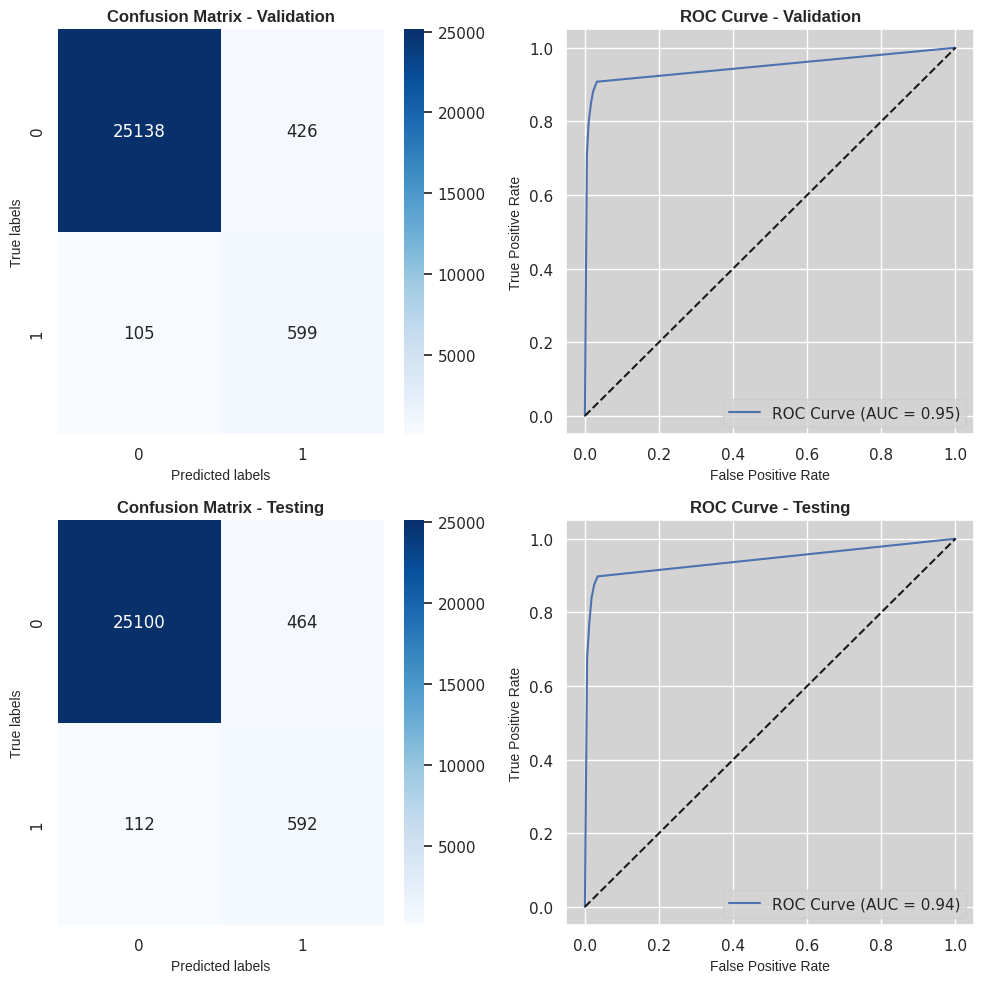

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Fit the model on training data
knn_model.fit(X_train_resampled, y_train_resampled)

# Function to plot confusion matrix
def plot_confusion_matrix(ax, y_true, y_pred, set_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_title(f'Confusion Matrix - {set_name}', fontname='Liberation Sans', fontsize=12, fontweight='bold')
    ax.set_xlabel('Predicted labels', fontsize=10, fontname='Liberation Sans')
    ax.set_ylabel('True labels', fontsize=10, fontname='Liberation Sans')

# Function to plot ROC curve
def plot_roc_curve(ax, model, X, y, set_name):
    y_pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    auc = roc_auc_score(y, y_pred_proba)

    ax.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel('False Positive Rate', fontsize=10, fontname='Liberation Sans')
    ax.set_ylabel('True Positive Rate', fontsize=10, fontname='Liberation Sans')
    ax.set_title(f'ROC Curve - {set_name}', fontname='Liberation Sans', fontsize=12, fontweight='bold')
    ax.legend(loc='lower right')

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Adjust the figsize as needed

# Plot confusion matrix and ROC curve for validation set
plot_confusion_matrix(axs[0, 0], y_val, knn_model.predict(X_val), "Validation")
plot_roc_curve(axs[0, 1], knn_model, X_val, y_val, "Validation")

# Plot confusion matrix and ROC curve for testing set
plot_confusion_matrix(axs[1, 0], y_test, knn_model.predict(X_test), "Testing")
plot_roc_curve(axs[1, 1], knn_model, X_test, y_test, "Testing")

plt.tight_layout()
plt.show()

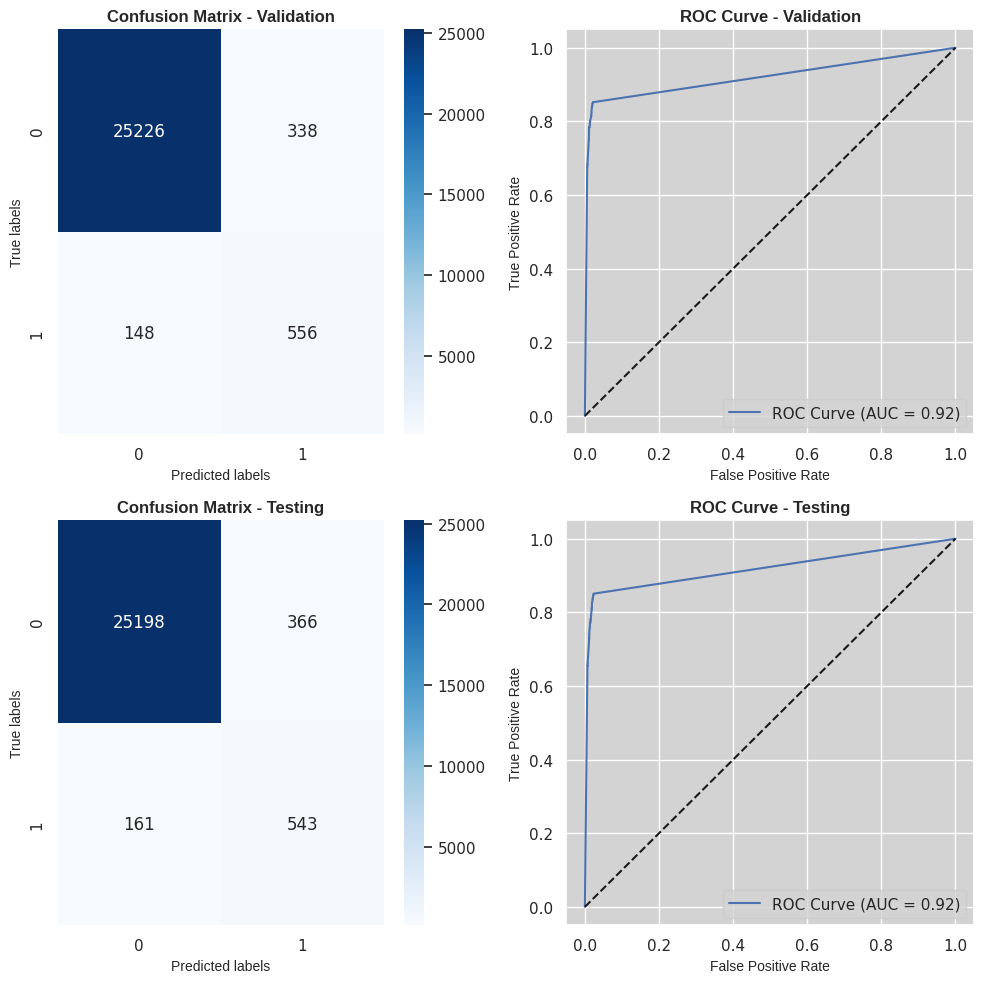

In [47]:
# Create subplots after Hypermeter Tuning
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Adjust the figsize as needed

# Plot confusion matrix and ROC curve for validation set
plot_confusion_matrix(axs[0, 0], y_val, best_knn_model.predict(X_val), "Validation")
plot_roc_curve(axs[0, 1], best_knn_model, X_val, y_val, "Validation")

# Plot confusion matrix and ROC curve for testing set
plot_confusion_matrix(axs[1, 0], y_test, best_knn_model.predict(X_test), "Testing")
plot_roc_curve(axs[1, 1], best_knn_model, X_test, y_test, "Testing")

plt.tight_layout()
plt.show()

In [49]:
from sklearn.metrics import classification_report

# Before hyperparameter tuning
print("Classification Report Before Hyperparameter Tuning:")
print(classification_report(y_val, knn_model.predict(X_val)))

# After hyperparameter tuning
print("\nClassification Report After Hyperparameter Tuning:")
print(classification_report(y_val, best_knn_model.predict(X_val)))

Classification Report Before Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     25564
           1       0.58      0.85      0.69       704

    accuracy                           0.98     26268
   macro avg       0.79      0.92      0.84     26268
weighted avg       0.98      0.98      0.98     26268


Classification Report After Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     25564
           1       0.62      0.79      0.70       704

    accuracy                           0.98     26268
   macro avg       0.81      0.89      0.84     26268
weighted avg       0.98      0.98      0.98     26268



In [51]:
from sklearn.metrics import classification_report

# Before hyperparameter tuning
print("Classification Report Before Hyperparameter Tuning:")
print(classification_report(y_val, knn_model.predict(X_test)))

# After hyperparameter tuning
print("\nClassification Report After Hyperparameter Tuning:")
print(classification_report(y_val, best_knn_model.predict(X_test)))

Classification Report Before Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     25564
           1       0.02      0.04      0.03       704

    accuracy                           0.93     26268
   macro avg       0.50      0.50      0.50     26268
weighted avg       0.95      0.93      0.94     26268


Classification Report After Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     25564
           1       0.03      0.04      0.03       704

    accuracy                           0.94     26268
   macro avg       0.50      0.50      0.50     26268
weighted avg       0.95      0.94      0.94     26268

